In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import shutil

# Define the source directory and destination subfolders
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")  # Replace with path containing all images
destination_dir = "dataset"  # Root directory with subfolders healthy/stressed/diseased

# Create subdirectories if they don't exist
categories = ["healthy", "stressed", "diseased"]
for category in categories:
    os.makedirs(os.path.join(destination_dir, category), exist_ok=True)

# Iterate through all files in the source directory
for filename in os.listdir(image_dir ):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Ensure it's an image
        # Logic to sort into categories based on filename (customize as needed)
        if "healthy" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "healthy", filename))
        elif "stressed" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "stressed", filename))
        elif "diseased" in filename.lower():
            shutil.move(os.path.join(source_dir, filename), os.path.join(destination_dir, "diseased", filename))

print("Files have been categorized into respective subfolders.")


Files have been categorized into respective subfolders.


In [5]:
import cv2
import os
# Specify the path to the Kaggle dataset
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")   # Update with the actual dataset path


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Function to load and preprocess images from directories
def load_images_and_extract_features(image_dir, image_size=(64, 64)):
    X = []
    y = []
    # Map class labels to integers
    class_mapping = {'healthy': 0, 'stressed': 1, 'diseased': 2}
    
    # Iterate over each category directory
    for class_name, class_id in class_mapping.items():
        class_path = os.path.join(image_dir, class_name)
        if os.path.exists(class_path):  # Ensure path exists
            for filename in os.listdir(class_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(class_path, filename)
                    # Read and resize image
                    image = cv2.imread(image_path)
                    if image is not None:
                        image = cv2.resize(image, image_size)
                        X.append(image.flatten())  # Flatten image into a single row
                        y.append(class_id)  # Append the target class
        else:
            print(f"Warning: Directory {class_path} does not exist.")
    
    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    
    print(f"Loaded {len(y)} samples.")
    return X, y

In [8]:
# Set directory path to your dataset
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")


In [9]:
# Load the data
print("Loading images and extracting features...")
X, y = load_images_and_extract_features(image_dir)

Loading images and extracting features...
Loaded 296 samples.


In [10]:
import os
print("Current directory:", os.getcwd())


Current directory: C:\Users\Asus


In [11]:
import os

# Debugging: List contents of the directory to check
print("Checking directory contents...")
print(os.listdir(image_dir))


Checking directory contents...
['diseased', 'healthy', 'stressed']


In [12]:
for class_folder in os.listdir(image_dir):
    path = os.path.join(image_dir, class_folder)
    if os.path.isdir(path):
        print(f"Checking images in: {path}")
        print(os.listdir(path))


Checking images in: C:\Users\Asus\Documents\Crop Dataset\diseased
['00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG', '00090b0f-c140-4e77-8d20-d39f67b75fcc___FAM_B.Rot 0376_flipLR.JPG', '0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '0024203d-6e4c-490f-b9a8-e5926df0b76e___RS_L.Scorch 0795.JPG', '0024203d-6e4c-490f-b9a8-e5926df0b76e___RS_L.Scorch 0795_flipLR.JPG', '003d09ef-e16c-4e8a-badf-847d46cb3dc0___FAM_B.Rot 3184_flipLR.JPG', '004175d8-dc74-4285-8401-3cc9565730bb___FAM_B.Rot 0626.JPG', '004175d8-dc74-4285-8401-3cc9565730bb___FAM_B.Rot 0626_flipLR.JPG', '005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy.jpg', '005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy_180deg.jpg', '005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy_flipTB.jpg', '006efc68-9e46-4168-921c-10ef8065702c___FAM_B.Rot 3470.JPG', '006efc68-9e46-4168-921c-10ef8065702c___FAM_B.Rot 3470_flipLR.JPG', '0079c731-80f5-4fea-b6a2-4ff23a7ce139___RS_NLB 4121.JPG', '0079c731-80f5-4fea-b6a

In [13]:
image_dir = ("C:\\Users\\Asus\\Documents\\Crop Dataset")
print("Loading dataset...")
X, y = load_images_and_extract_features(image_dir)

# Debugging: Check if X and y are populated
if len(y) == 0 or len(X) == 0:
    raise ValueError("No data was loaded. Please check the image directory and paths.")
else:
    print("Data successfully loaded. Proceeding...")


Loading dataset...
Loaded 296 samples.
Data successfully loaded. Proceeding...


In [14]:
# Split the data into train and test sets
print("Splitting dataset...")
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Train set size: {len(y_train)}")
    print(f"Test set size: {len(y_test)}")
except Exception as e:
    print(f"Error during train-test split: {e}")
    raise

Splitting dataset...
Train set size: 236
Test set size: 60


In [15]:
# Train the Naive Bayes model
print("Training Naive Bayes classifier...")
model = GaussianNB()
model.fit(X_train, y_train)

Training Naive Bayes classifier...


GaussianNB()

In [16]:
# Test the model
print("Evaluating on test data...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Evaluating on test data...
Test Accuracy: 0.9333333333333333


In [17]:
# Step 5: Evaluate the Model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       1.00      0.67      0.80         6
           2       0.96      0.98      0.97        47

    accuracy                           0.93        60
   macro avg       0.90      0.83      0.86        60
weighted avg       0.94      0.93      0.93        60


Confusion Matrix:
 [[ 6  0  1]
 [ 1  4  1]
 [ 1  0 46]]


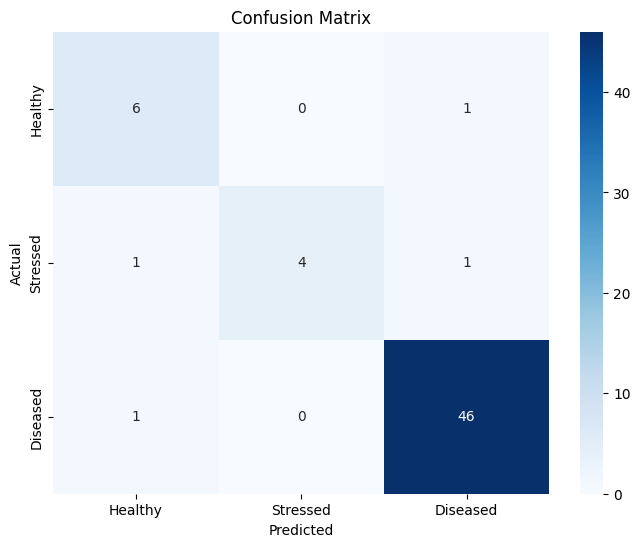

In [18]:
# Step 6: Visualize Results
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'Stressed', 'Diseased'], yticklabels=['Healthy', 'Stressed', 'Diseased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
# Print actual test values
print("Actual values (y_test):")
print(y_test)

# Print predicted test values
print("\nPredicted values (y_pred):")
print(y_pred)


Actual values (y_test):
[2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 0 2 0 2 2 2 0 0 2 0 1 2 2 2]

Predicted values (y_pred):
[2 2 2 2 2 0 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 0
 2 2 2 2 2 2 2 1 2 0 2 0 2 2 2 2 0 2 0 1 2 2 2]


In [20]:
print("Checking test data features:")
print(X_test[:5])  # Inspect the first few rows of test data


Checking test data features:
[[ 79 135 116 ... 153 152 156]
 [ 69  64  79 ... 100  85  93]
 [117  80  96 ...  25  23  42]
 [ 40  63  52 ... 142 135 142]
 [ 68  60  68 ... 154 146 157]]


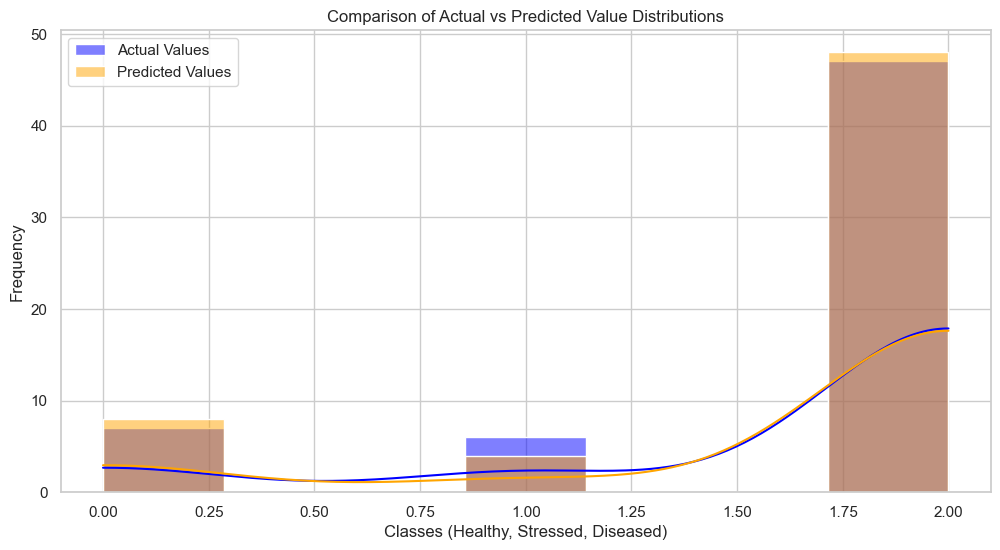

In [21]:
sns.set(style="whitegrid")

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for actual values
sns.histplot(y_test, color='blue', label="Actual Values", alpha=0.5, kde=True)

# Histogram for predicted values
sns.histplot(y_pred, color='orange', label="Predicted Values", alpha=0.5, kde=True)

# Add legend, labels, and title
plt.legend()
plt.xlabel("Classes (Healthy, Stressed, Diseased)")
plt.ylabel("Frequency")
plt.title("Comparison of Actual vs Predicted Value Distributions")

# Show the plot
plt.show()

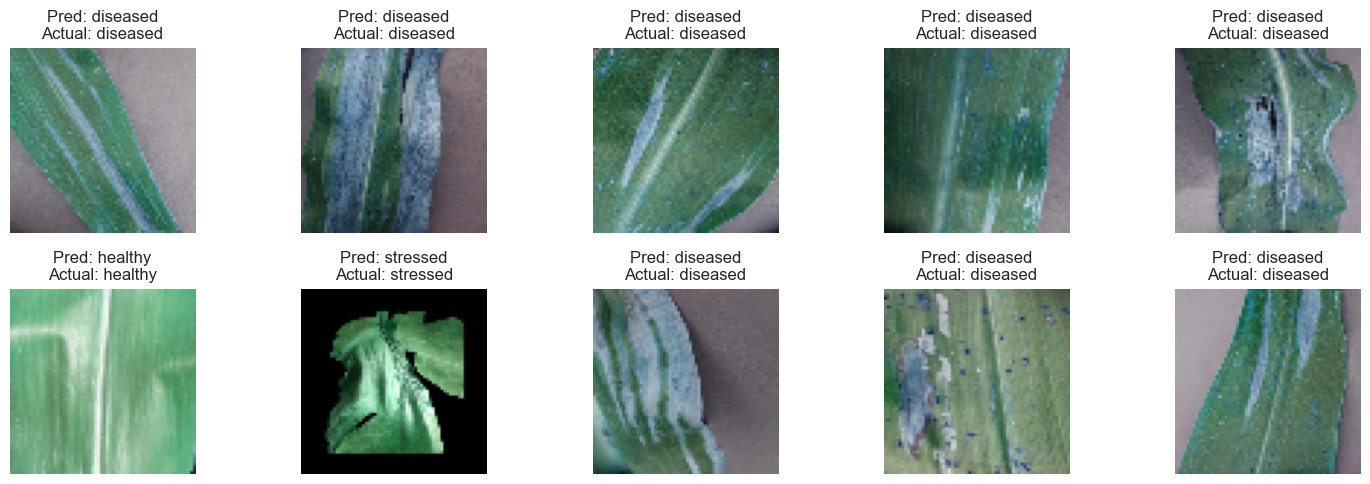

In [22]:
import matplotlib.pyplot as plt

# Function to visualize images and predictions
def visualize_predictions(X_test, y_test, y_pred, class_mapping, num_samples=10):
    """
    Visualize sample images and their predictions.
    
    Args:
        X_test: Test features (numpy array).
        y_test: Actual labels for the test data.
        y_pred: Predicted labels by the trained model.
        class_mapping: Dictionary mapping class indices to names.
        num_samples: Number of samples to visualize.
    """
    # Set up the plotting
    plt.figure(figsize=(15, 5))
    
    # Randomly select images to visualize
    indices = range(min(num_samples, len(X_test)))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        
        # Reshape the flattened image back to 2D (e.g., 64x64)
        image = X_test[idx].reshape(64, 64, 3)
        
        # Display the image
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        
        # Set the title to show predicted vs actual
        plt.title(
            f"Pred: {class_mapping[y_pred[idx]]}\nActual: {class_mapping[y_test[idx]]}"
        )
    
    plt.tight_layout()
    plt.show()


# Create a mapping from label index to class name
class_mapping = {0: 'healthy', 1: 'stressed', 2: 'diseased'}

# Visualize predictions
visualize_predictions(X_test, y_test, y_pred, class_mapping, num_samples=10)


In [23]:
#Debugging Tips
# Confirm X_test contains valid data by printing its shape:
print(X_test.shape)


(60, 12288)


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# X, y = load_images_and_extract_features(image_dir)  # Uncomment for real data
if 'X' not in locals() or 'y' not in locals():
    np.random.seed(42)  # For reproducibility
    X = np.random.rand(100, 5)  # 100 samples, 5 features
    y = np.random.rand(100) * 100  # 100 continuous crop health values (scale 0-100)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
# Initialize the Linear Regression model
model = LinearRegression()



In [30]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Model Performance Metrics:
Mean Squared Error (MSE): 0.2392737327589742
R-squared (R2): 0.4747649768705444


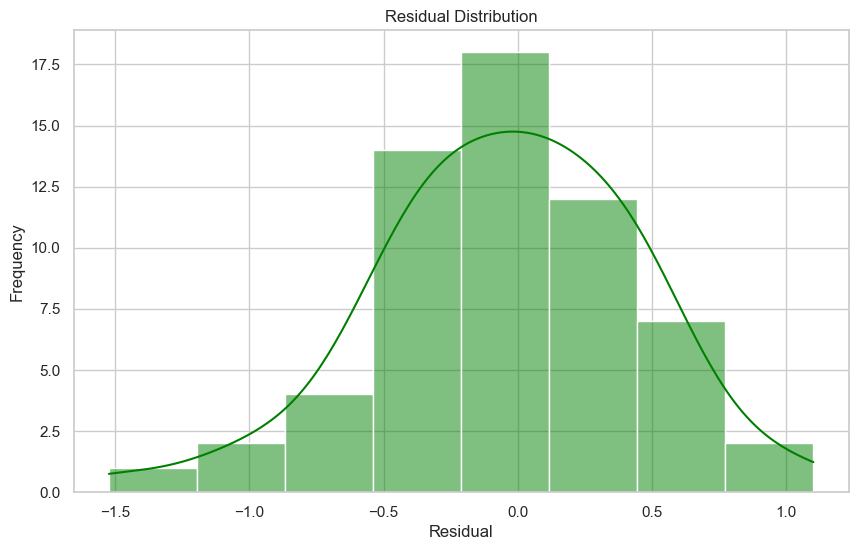

In [33]:
# Plot histogram for residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

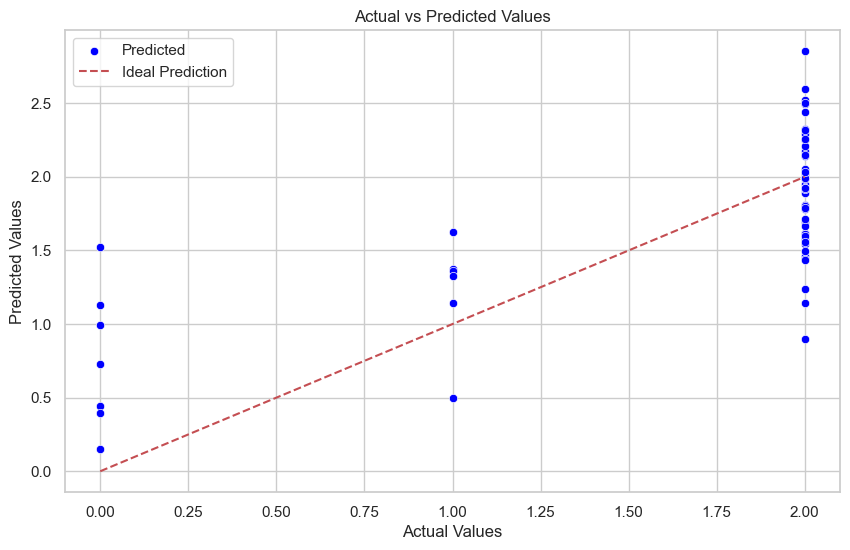

In [34]:
# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [38]:
import matplotlib.pyplot as plt

# Model Accuracy for Comparison
nb_accuracy = accuracy_score(y_test, y_pred)  # Accuracy for Naive Bayes
regression_accuracy = r2_score(y_test, y_pred)  # Using R² score for regression model as a comparison metric

# Prepare Data
models = ['Naive Bayes', 'Multilinear Regression']
accuracies = [nb_accuracy, regression_accuracy]

# Create Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])

# Add Text Annotations
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

# Formatting
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (or R² Score)', fontsize=12)
plt.ylim(0, 1.2)  # Ensure bars are clearly visible
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.tight_layout()
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets